# Make new tracks, bypass RL, win money :D

We start with the usual imports...

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ignore deprecation warnings
import warnings
warnings.filterwarnings('ignore')

In [18]:
#copy waypoints from logfile where print(params) was applied
# Example from Fumiaki loop (until january is available)
a = {'waypoints': [(8.12431812286377, 0.9884904026985168), (8.086380004882812, 1.2322419881820679), (8.048443078994751, 1.475993037223816), (8.010504007339478, 1.7197440266609192), (7.972568035125732, 1.963496446609497), (7.934642553329468, 2.2072595357894897), (7.89715838432312, 2.4510819911956787), (7.860599994659424, 2.694797992706299), (7.823238134384155, 2.9386719465255737), (7.785614728927612, 3.1826109886169434), (7.748008966445923, 3.426566004753113), (7.710411787033081, 3.6705124378204346), (7.66268253326416, 3.9129165410995483), (7.606831073760986, 4.123275518417358), (7.538827896118164, 4.330195426940918), (7.473352432250977, 4.504245042800903), (7.418391466140747, 4.615414142608643), (7.350448131561279, 4.7208147048950195), (7.271114349365234, 4.821835517883301), (7.171124458312988, 4.9144744873046875), (7.049574613571167, 5.004922389984131), (6.88931941986084, 5.094431400299072), (6.665685415267944, 5.200993061065674), (6.4503724575042725, 5.3212034702301025), (6.243717193603516, 5.455868482589722), (6.04146146774292, 5.599713563919067), (5.8312668800354, 5.729801416397095), (5.6059699058532715, 5.82970118522644), (5.4196555614471436, 5.8815460205078125), (5.254481077194214, 5.902042865753174), (5.092396974563599, 5.9034295082092285), (4.9177680015563965, 5.875003099441528), (4.7680675983428955, 5.821169853210449), (4.625657796859741, 5.747572422027588), (4.483626008033752, 5.6375555992126465), (4.372556090354919, 5.5129923820495605), (4.273463487625122, 5.367404937744141), (4.186340570449829, 5.175290584564209), (4.132157564163208, 4.970823049545288), (4.1032469272613525, 4.725077867507935), (4.104186415672302, 4.477489471435547), (4.133409023284912, 4.23215913772583), (4.185578465461731, 3.9907249212265015), (4.255492568016052, 3.75332248210907), (4.335228085517883, 3.519709587097168), (4.413285851478577, 3.285557508468628), (4.490407943725586, 3.051064968109131), (4.575141906738281, 2.8064310550689697), (4.665269613265991, 2.557635545730591), (4.761425971984863, 2.2958614826202393), (4.845442295074463, 2.049849033355713), (4.914431571960449, 1.8049694895744324), (4.9590840339660645, 1.5599904656410217), (4.968848943710327, 1.3767715096473694), (4.953732013702393, 1.225703477859497), (4.9243080615997314, 1.0923536717891693), (4.874530076980591, 0.9744531214237213), (4.811803817749023, 0.8670504242181778), (4.7310638427734375, 0.7757765799760818), (4.639754056930542, 0.6960672959685326), (4.53597092628479, 0.6351533643901348), (4.425333380699158, 0.5868358723819256), (4.31070601940155, 0.5462696515023708), (4.133717060089111, 0.5105358138680458), (3.9520061016082764, 0.4950168505311012), (3.7228105068206787, 0.4923985004425049), (3.481923460960388, 0.4975791871547699), (3.245776414871216, 0.501126155257225), (3.035504460334778, 0.50196872651577), (2.8252240419387817, 0.5016545429825783), (2.593984603881836, 0.5014481991529465), (2.3312524557113647, 0.5014559105038643), (2.3312524557113647, 0.5014559105038643), (2.0685290098190308, 0.5015483349561691), (1.821654498577118, 0.5012944936752319), (1.5748854875564575, 0.5017464235424995), (1.3278529644012451, 0.49889006465673447), (1.0805863738059998, 0.4953853487968445), (0.8922330141067505, 0.5015363693237305), (0.7341673970222473, 0.5192165374755859), (0.5884353518486023, 0.5470210313796997), (0.444983147084713, 0.5935898460447788), (0.2900082990527153, 0.6586092279758304), (0.13993845880031586, 0.7347002364695072), (-0.07424405217170715, 0.8577179685235023), (-0.2859680615365505, 0.9852865785360336), (-0.49984051287174225, 1.1095064878463745), (-0.7144187539815903, 1.231426864862442), (-0.9287944138050079, 1.3543725907802582), (-1.1432064771652222, 1.4824312031269073), (-1.358678787946701, 1.616392433643341), (-1.5730475187301636, 1.7552099823951721), (-1.7863735556602478, 1.8984400033950806), (-2.00101900100708, 2.041799545288086), (-2.2202319502830505, 2.177119493484497), (-2.4457980394363403, 2.302161931991577), (-2.6396130323410034, 2.393519937992096), (-2.841279983520508, 2.461174488067627), (-3.0088279247283936, 2.4887245297431946), (-3.159435987472534, 2.4883150458335876), (-3.301242470741272, 2.4654030203819275), (-3.438712000846863, 2.415762960910797), (-3.574346423149109, 2.340478003025055), (-3.708780884742737, 2.2319304943084717), (-3.8442704677581787, 2.0913585424423218), (-3.9776545763015747, 1.9165594577789307), (-4.128239035606384, 1.691877007484436), (-4.285765051841736, 1.4670869410037994), (-4.400313138961792, 1.3299558758735657), (-4.531231164932251, 1.211074411869049), (-4.66146993637085, 1.1303751021623611), (-4.794528007507324, 1.0796546787023544), (-4.928571701049805, 1.0485481023788452), (-5.067189455032349, 1.0454987287521362), (-5.209157705307007, 1.0622868537902832), (-5.3572704792022705, 1.1097516119480133), (-5.516993522644043, 1.182623952627182), (-5.698852062225342, 1.298611044883728), (-5.934061527252197, 1.4790048897266388), (-6.1242475509643555, 1.6191474497318268), (-6.298676490783691, 1.7270694971084595), (-6.4555253982543945, 1.8048919439315796), (-6.603607654571533, 1.8571669459342957), (-6.74675440788269, 1.8865530490875244), (-6.886257648468018, 1.8930449485778809), (-7.022120952606201, 1.8779180645942688), (-7.153216600418091, 1.8405635356903076), (-7.278866529464722, 1.7810590267181396), (-7.400071859359741, 1.7009375095367432), (-7.516464948654175, 1.5975424647331238), (-7.629418134689331, 1.4696255028247833), (-7.7278151512146, 1.3294013738632202), (-7.829723834991455, 1.1528145372867584), (-7.913762092590332, 0.9830333590507507), (-8.009573459625244, 0.7542399913072586), (-8.100673913955688, 0.5238058492541313), (-8.194724082946777, 0.2956051635555923), (-8.298619985580444, 0.07173889875411987), (-8.409120082855225, -0.14898010343313217), (-8.518901824951172, -0.37005828879773617), (-8.628087759017944, -0.5914282500743866), (-8.738917350769043, -0.8120833486318588), (-8.85364580154419, -1.030766874551773), (-8.974236488342285, -1.2464678883552551), (-9.095809936523438, -1.4617609977722168), (-9.19411325454712, -1.6873124837875366), (-9.260026454925537, -1.923838555812834), (-9.296059608459473, -2.1673964262008685), (-9.310271263122559, -2.3729485273361206), (-9.307019233703613, -2.5788949728012085), (-9.290980815887451, -2.7426079511642456), (-9.265025615692139, -2.8841819763183594), (-9.2300705909729, -3.0132004022598267), (-9.183152675628662, -3.133615493774414), (-9.124776363372803, -3.247638463973999), (-9.051392555236816, -3.3558889627456665), (-8.963252067565918, -3.4617279767990112), (-8.853052616119385, -3.568813443183899), (-8.713794708251953, -3.6908544301986694), (-8.531688451766968, -3.8569865226745605), (-8.372043132781982, -4.04205048084259), (-8.238671064376831, -4.246592402458191), (-8.132850885391235, -4.46875), (-8.050578594207764, -4.658127784729004), (-7.972878694534302, -4.8272175788879395), (-7.896465539932251, -4.974606990814209), (-7.814936876296997, -5.1023054122924805), (-7.726712942123413, -5.216485977172852), (-7.62753963470459, -5.320809602737427), (-7.519604921340942, -5.416505336761475), (-7.397137641906738, -5.513267993927002), (-7.2504494190216064, -5.617475509643555), (-7.048876523971558, -5.7599194049835205), (-6.850481033325195, -5.906782627105713), (-6.649286508560181, -6.049717426300049), (-6.435657024383545, -6.176938056945801), (-6.208886384963989, -6.273805379867554), (-6.029123067855835, -6.317962884902954), (-5.883344888687134, -6.333068609237671), (-5.736926555633545, -6.328474521636963), (-5.607994794845581, -6.307444095611572), (-5.4852294921875, -6.275675535202026), (-5.369054794311523, -6.229165315628052), (-5.259897470474243, -6.167568922042847), (-5.158555507659912, -6.093203544616699), (-5.06749701499939, -6.0031139850616455), (-4.98659610748291, -5.899354457855225), (-4.919483661651611, -5.778003454208374), (-4.865926027297974, -5.6392738819122314), (-4.831943511962891, -5.477758169174194), (-4.818969011306763, -5.292669057846069), (-4.83566951751709, -5.085668325424194), (-4.8848326206207275, -4.842398643493652), (-4.951838493347168, -4.603148460388184), (-5.025342702865601, -4.3662941455841064), (-5.088326930999756, -4.127242565155029), (-5.130080938339233, -3.8840184211730957), (-5.155987977981567, -3.6385674476623535), (-5.1728644371032715, -3.392338514328003), (-5.181535005569458, -3.145156502723694), (-5.182666540145874, -2.895782470703125), (-5.170444965362549, -2.64713454246521), (-5.141123056411743, -2.4016629457473755), (-5.096296548843384, -2.20236998796463), (-5.0260045528411865, -2.012779474258423), (-4.9460461139678955, -1.872079074382782), (-4.856797933578491, -1.7525565028190613), (-4.770139455795288, -1.6644110083580017), (-4.670130968093872, -1.594367653131485), (-4.556408405303955, -1.5389962196350098), (-4.431985139846802, -1.4982959032058716), (-4.2897820472717285, -1.479777216911316), (-4.132490396499634, -1.4801546037197113), (-3.9508520364761353, -1.5120134055614471), (-3.744681477546692, -1.5708953142166138),
                   (-3.513489007949829, -1.6688810586929321), (-3.2873870134353638, -1.7803704738616943), (-3.0659879446029663, -1.8896265029907227), (-2.8428244590759277, -1.9949644804000854), (-2.619845986366272, -2.1009715795516968), (-2.404729962348938, -2.2159374952316284), (-2.1922755241394043, -2.333102524280548), (-1.982692539691925, -2.448066473007202), (-1.7868344187736511, -2.570488452911377), (-1.6202459931373596, -2.705993890762329), (-1.493972837924955, -2.8402489423751858), (-1.3763171434402466, -2.983103036880493), (-1.262414127588272, -3.129210948944092), (-1.1287773251533508, -3.2925894260406494), (-0.9973797798156754, -3.4333264827728254), (-0.8654543161392212, -3.549507975578308), (-0.7281691133975983, -3.6452596187591553), (-0.5785466134548187, -3.722331166267395), (-0.4112188443541527, -3.783251166343689), (-0.2231699451804161, -3.8259259462356567), (-0.031099549029022455, -3.849012613296509), (0.21535785496234894, -3.8624050617218018), (0.4619779586791992, -3.8575409650802612), (0.7058971971273422, -3.8195680379867554), (0.8649654388427734, -3.768284559249878), (1.0095209777355194, -3.70067298412323), (1.1387284696102142, -3.6170005798339844), (1.259017288684845, -3.5165555477142334), (1.3745339214801788, -3.38874351978302), (1.4733079373836517, -3.2470074892044067), (1.5934688746929169, -3.03063702583313), (1.714346468448639, -2.814239501953125), (1.8256549835205078, -2.6380715370178223), (1.9424825310707092, -2.492061972618103), (2.062934994697571, -2.374499499797821), (2.1918880343437195, -2.284302532672882), (2.333604574203491, -2.213764488697052), (2.4990124702453613, -2.1619025468826294), (2.7072635889053345, -2.129780948162079), (2.9189255237579346, -2.1197924613952637), (3.125335931777954, -2.119749963283539), (3.3301249742507935, -2.1389089822769165), (3.4910188913345337, -2.1746585369110107), (3.6277875900268555, -2.2239180207252502), (3.7511314153671265, -2.283437490463257), (3.866363048553467, -2.3557459712028503), (3.979614019393921, -2.439976453781128), (4.0961281061172485, -2.5432949662208557), (4.228511929512024, -2.6745409965515137), (4.399149060249329, -2.85362708568573), (4.571305990219116, -3.0310670137405396), (4.754154920578003, -3.1967769861221313), (4.921145915985107, -3.316844940185547), (5.083767414093018, -3.4044893980026245), (5.236791610717773, -3.4653135538101196), (5.381695032119751, -3.5020899772644043), (5.52078104019165, -3.5222115516662598), (5.661412477493286, -3.5291489362716675), (5.908102512359619, -3.5241494178771973), (6.154648065567017, -3.511675000190735), (6.401369094848633, -3.504562497138977), (6.648145914077759, -3.499761462211609), (6.894919157028198, -3.4936060905456543), (7.110523462295532, -3.4762868881225586), (7.307848691940308, -3.441709518432617), (7.4625279903411865, -3.3953850269317627), (7.5950775146484375, -3.342887043952942), (7.711983919143677, -3.2795250415802), (7.820120096206665, -3.2096660137176514), (7.918773174285889, -3.1298835277557373), (8.011921882629395, -3.043442964553833), (8.097152948379517, -2.9467190504074097), (8.178373098373413, -2.84033203125), (8.25303339958191, -2.717187523841858), (8.327041625976562, -2.570037007331848), (8.400359869003296, -2.3773900270462036), (8.454155683517456, -2.1782084703445435), (8.498638391494751, -1.9351195096969604), (8.513131380081177, -1.690551996231079), (8.500330924987793, -1.4454104900360107), (8.466455698013306, -1.2029719948768616), (8.427306413650513, -0.9607942402362823), (8.390488147735596, -0.7179563343524933), (8.352124691009521, -0.4740799069404602), (8.313992977142334, -0.23028354346752167), (8.276074409484863, 0.013493970036506653), (8.238128423690796, 0.2572329491376877), (8.200194120407104, 0.5009891092777252), (8.162255764007568, 0.7447387278079987), (8.12431812286377, 0.9884904026985168)]}
df = pd.DataFrame(a)
print("Total number of waypoints:", len(df))

Total number of waypoints: 305


In [19]:
x,y = zip(*df['waypoints'])

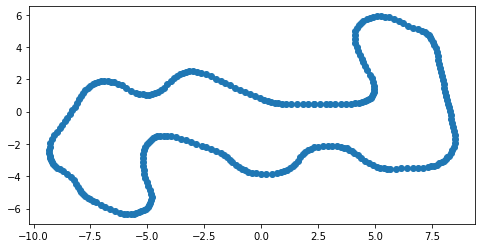

In [20]:
# Print the waypoints to check the loop is correct
fig = plt.figure(figsize=(8,4))
plt.scatter(x, y)

In [31]:
#create outer and inner border track limits


from shapely.geometry import LineString
from shapely.geometry import Point
waypoints = LineString(df['waypoints'])
# Hyperparams found on internet
outer_border = waypoints.parallel_offset(1.447/2, 'left', join_style=1, resolution=16)  #HERE
inner_border = waypoints.parallel_offset(1.447/2, 'right', join_style=1,resolution=16)  #HERE
#1.07 is for fumiaki, change with width of the circuit once we know it or get it from the params

print(waypoints)
print(outer_border[1])
print(inner_border)

outer_border = outer_border[1] 
#For some reason sometimes it gives multilinestring instead of linestring, just gott lick the good line then
# The documentation sucks

LINESTRING (8.12431812286377 0.9884904026985168, 8.086380004882813 1.232241988182068, 8.048443078994751 1.475993037223816, 8.010504007339478 1.719744026660919, 7.972568035125732 1.963496446609497, 7.934642553329468 2.20725953578949, 7.89715838432312 2.451081991195679, 7.860599994659424 2.694797992706299, 7.823238134384155 2.938671946525574, 7.785614728927612 3.182610988616943, 7.748008966445923 3.426566004753113, 7.710411787033081 3.670512437820435, 7.66268253326416 3.912916541099548, 7.606831073760986 4.123275518417358, 7.538827896118164 4.330195426940918, 7.473352432250977 4.504245042800903, 7.418391466140747 4.615414142608643, 7.350448131561279 4.72081470489502, 7.271114349365234 4.821835517883301, 7.171124458312988 4.914474487304688, 7.049574613571167 5.004922389984131, 6.88931941986084 5.094431400299072, 6.665685415267944 5.200993061065674, 6.450372457504272 5.321203470230103, 6.243717193603516 5.455868482589722, 6.04146146774292 5.599713563919067, 5.8312668800354 5.72980141639709

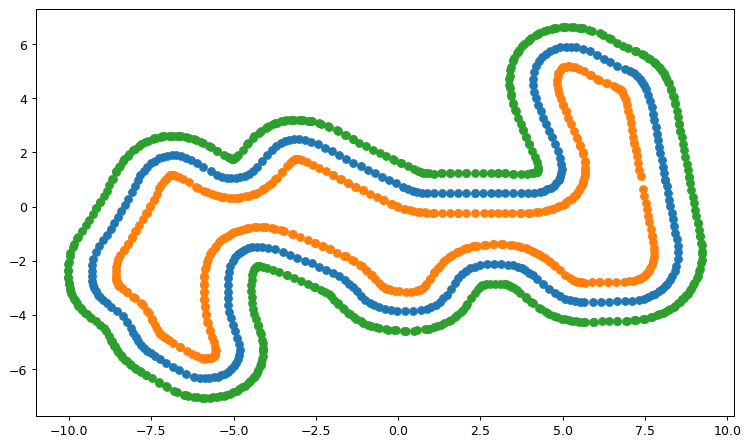

In [32]:
#Plot the points to make sure it's ok
fig = plt.figure(1, figsize=(22,6), dpi=90)
ax = fig.add_subplot(121)

x1, y1 = waypoints.xy
ax.scatter(x1, y1)
x2, y2 = outer_border.xy
ax.scatter(x2, y2)
x3, y3 = inner_border.xy
ax.scatter(x3, y3)

In [33]:
print('Length of autogenerated inner and outer border points are not the same!!!')
print("center: ", len(x1))
print("outer: ", len(x2))
print("inner: ", len(x3))

Length of autogenerated inner and outer border points are not the same!!!
center:  305
outer:  434
inner:  497


In [34]:
#Interpolate inner and outer border to the same number of points as central waypoints
pt_outer = []
pt_inner = []

for point in df['waypoints']:
    pt = Point(point)
    pt_outer.append(outer_border.interpolate(outer_border.project(pt)))
    pt_inner.append(inner_border.interpolate(inner_border.project(pt)))

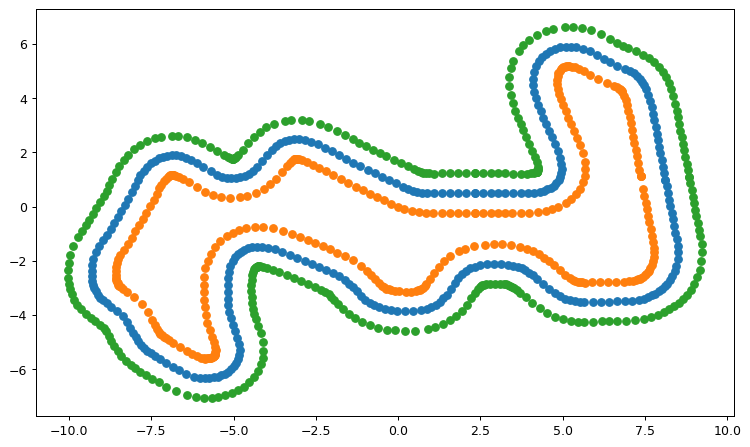

In [35]:
outer_border = LineString(pt_outer)
inner_border = LineString(pt_inner)

fig = plt.figure(1, figsize=(22,6), dpi=90)
ax = fig.add_subplot(121)

x1, y1 = waypoints.xy
ax.scatter(x1, y1)
x2, y2 = outer_border.xy
ax.scatter(x2, y2)
x3, y3 = inner_border.xy
ax.scatter(x3, y3)

In [36]:
print("Length of all three tracklines are now the same")
print("center: ", len(x1))
print("outer: ", len(x2))
print("inner: ", len(x3))

Length of all three tracklines are now the same
center:  305
outer:  305
inner:  305


In [37]:
#Save in same numpy format as trackfiles
track = np.array([list(a) for a in zip(x1, y1, x2, y2, x3, y3)])
np.save("../tracks/January_Pre_Season.npy",track)

We could also find a way to check the output, but we can do that in the raceline computation file, no need to do the same work twice. I tested the fumiyaki loop with it, seems to work.

The End